In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

C:\Users\tli19\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


Import some helper functions (See [here](https://github.com/t36li/Airbnb/blob/master/helper_functions.py) if interested)

In [2]:
import helper_functions as udf

In [3]:
import datetime
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data=pd.read_csv('./TH_data_challenge.tsv',sep='\t', parse_dates=['ds_night', 'ds'],date_parser=dateparse)

### Initial Data Exploration
First see what data looks like.   
Then see if there is anything obviously wrong with the data (e.g. lots of missing, outlier values).  
Will also drop some columns that do not add predictive power to model based on data dictionary provided (i.e. IDs).

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head(3)

,dim_is_requested,ds_night,ds,id_listing_anon,id_user_anon,m_effective_daily_price,m_pricing_cleaning_fee,dim_market,dim_lat,dim_lng,dim_room_type,dim_person_capacity,dim_is_instant_bookable,m_checkouts,m_reviews,days_since_last_booking,cancel_policy,image_quality_score,m_total_overall_rating,m_professional_pictures,dim_has_wireless_internet,ds_night_day_of_week,ds_night_day_of_year,ds_checkin_gap,ds_checkout_gap,occ_occupancy_plus_minus_7_ds_night,occ_occupancy_plus_minus_14_ds_night,occ_occupancy_trailing_90_ds,m_minimum_nights,m_maximum_nights,price_booked_most_recent,p2_p3_click_through_score,p3_inquiry_score,listing_m_listing_views_2_6_ds_night_decay,general_market_m_unique_searchers_0_6_ds_night,general_market_m_contacts_0_6_ds_night,general_market_m_reservation_requests_0_6_ds_night,general_market_m_is_booked_0_6_ds_night,m_available_listings_ds_night,kdt_score,r_kdt_listing_views_0_6_avg_n100,r_kdt_n_active_n100,r_kdt_n_available_n100,r_kdt_m_effective_daily_price_n100_p50,r_kdt_m_effective_daily_price_available_n100_p50,r_kdt_m_effective_daily_price_booked_n100_p50
0,False,2015-01-06,2014-12-07,0ae0c7cc-a8a4-425f-9ccc-8b25dbb94f4d,dcc74708-d5c4-47b2-bc0c-97bf5abfcd99,110.0,60.0,Los Angeles,34.053932,-118.36297,Private room,2,False,24.0,19.0,320.0,4,0.830959,74.0,16.0,1,2,6,0.0,7.0,NaN,NaN,0.000000,5.0,90.0,92.0,NaN,NaN,0.133333,788.142857,241.428571,41.428571,1.0,9840,1.314286,1.795918,57.0,48.0,79.0,75.0,98.0
1,True,2015-01-21,2014-12-22,82fdda07-6993-4cca-8ee4-fc218d2c07c7,559d8981-0c75-4631-9582-a3b644bb5631,70.0,0.0,Los Angeles,34.108578,-118.20860,Private room,2,True,105.0,55.0,3.0,3,0.967384,263.0,0.0,1,3,21,7.0,7.0,NaN,NaN,0.359551,1.0,1125.0,70.0,NaN,NaN,0.066667,830.142857,298.000000,51.714286,1.0,9599,0.535714,2.693878,49.0,36.0,65.0,65.0,42.0
2,False,2015-01-22,2014-12-23,69b2069d-cf8f-49a7-b559-9619dbe86a7d,ee7901a6-79d5-4d69-bacf-e4bca976a66a,125.0,0.0,Los Angeles,34.077194,-118.20570,Private room,1,False,0.0,0.0,NaN,3,0.485231,0.0,0.0,1,4,22,7.0,7.0,NaN,NaN,0.000000,1.0,1125.0,NaN,NaN,NaN,0.000000,810.142857,281.000000,51.714286,1.0,9514,0.714286,2.775510,49.0,35.0,65.0,66.5,46.0


In [5]:
### Do some data cleaning ###
data['dim_is_requested'] = data['dim_is_requested'].map(lambda x: 1 if x else 0)

### Drop IDs. Lat, Lng may use later ###
data.drop(['ds_night','ds','id_listing_anon','id_user_anon','dim_lat','dim_lng'], axis=1, inplace=True)
data.shape

(184279, 40)

In [6]:
data.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

,dim_is_requested,m_effective_daily_price,m_pricing_cleaning_fee,dim_person_capacity,m_checkouts,m_reviews,days_since_last_booking,cancel_policy,image_quality_score,m_total_overall_rating,m_professional_pictures,dim_has_wireless_internet,ds_night_day_of_week,ds_night_day_of_year,ds_checkin_gap,ds_checkout_gap,occ_occupancy_plus_minus_7_ds_night,occ_occupancy_plus_minus_14_ds_night,occ_occupancy_trailing_90_ds,m_minimum_nights,m_maximum_nights,price_booked_most_recent,p2_p3_click_through_score,p3_inquiry_score,listing_m_listing_views_2_6_ds_night_decay,general_market_m_unique_searchers_0_6_ds_night,general_market_m_contacts_0_6_ds_night,general_market_m_reservation_requests_0_6_ds_night,general_market_m_is_booked_0_6_ds_night,m_available_listings_ds_night,kdt_score,r_kdt_listing_views_0_6_avg_n100,r_kdt_n_active_n100,r_kdt_n_available_n100,r_kdt_m_effective_daily_price_n100_p50,r_kdt_m_effective_daily_price_available_n100_p50,r_kdt_m_effective_daily_price_booked_n100_p50
count,184279.000000,184279.000000,184279.000000,184279.000000,184092.000000,184092.000000,146443.000000,184279.000000,170268.000000,184092.000000,184092.000000,184279.000000,184279.000000,184279.000000,182058.000000,182058.000000,163552.000000,163627.000000,174061.000000,182058.000000,1.820580e+05,146443.000000,57169.000000,54989.000000,181933.000000,184279.000000,184279.000000,184279.000000,184279.000000,184279.000000,184279.000000,184278.000000,184278.000000,184278.000000,184278.000000,184262.000000,171304.000000
mean,0.328361,149.405456,38.014286,3.265234,18.461883,10.971194,69.174136,4.154109,0.562056,47.881706,4.795211,0.937741,2.998763,174.657953,5.888091,6.123241,0.061373,0.079742,0.280268,4.998753,4.782557e+04,140.255458,0.231738,0.180926,0.385088,1702.574448,507.456627,91.624327,0.973079,18551.170611,1.067703,2.098260,90.208587,45.636869,109.231766,115.385867,95.601191
std,0.469618,272.233310,49.998184,2.009478,32.309469,20.020473,123.530963,0.816571,0.306840,86.908863,8.503853,0.241626,2.004867,108.087953,2.197909,2.041068,0.159816,0.171301,0.311951,22.389882,1.006587e+07,159.847870,0.073645,0.073416,1.032900,686.574394,255.179472,48.652866,0.071519,9099.781958,0.523330,2.081157,75.792493,37.506994,64.013523,72.728042,48.744252
min,0.000000,-55.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.052968,0.013492,0.000000,316.714286,52.000000,13.142857,0.571429,1028.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,29.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.012385,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000e+00,28.000000,0.100000,0.049100,0.000000,413.857143,66.571429,16.857143,0.714286,2096.000000,0.103448,0.000000,3.000000,2.000000,37.000000,37.523654,28.000000
10%,0.000000,51.080809,0.000000,2.000000,0.000000,0.000000,1.000000,3.000000,0.119119,0.000000,0.000000,1.000000,0.000000,31.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.400000e+01,49.000000,0.148337,0.095464,0.000000,859.428571,221.285714,37.142857,0.857143,7681.000000,0.416667,0.346939,21.000000,12.000000,56.002680,59.000000,49.000000
25%,0.000000,71.349427,0.000000,2.000000,1.000000,0.000000,5.000000,3.000000,0.300549,0.000000,0.000000,1.000000,1.000000,77.000000,7.000000,7.000000,0.000000,0.000000,0.000000,1.000000,3.000000e+01,69.000000,0.181564,0.128333,0.000000,1194.285714,349.714286,56.000000,1.000000,9690.000000,0.666667,0.857143,48.000000,25.000000,75.000000,77.728465,65.000000
50%,0.000000,100.000000,25.000000,2.000000,6.000000,3.000000,20.000000,4.000000,0.577958,14.000000,0.000000,1.000000,3.000000,171.000000,7.000000,7.000000,0.000000,0.000000,0.148148,2.000000,1.125000e+03,100.000000,0.223077,0.171852,0.000000,1629.857143,488.000000,83.142857,1.000000,21027.000000,1.037037,1.632653,86.000000,41.000000,95.2

### The Plan
* I will divide the data randomly into 60/40 for train/test. 
* Then, cap/floor all continuous variables in the training data at P99/P1 to treat outliers. 
* Next, data visualization for each feature vs label will be done. Specifically, the mean response will be plotted against each category for qualitative variables. For continuous variables, I will sort the feature and response in descending order, bin them into deciles, and plot the corresponding mean response rate. This is to get a rough idea of which variables have strong univariate predictive power. Missing values will be assigned a category for themselves.
* Then, a simple model (Random Forest, Logistic Regression, etc.) will be fit. Performance metric will use AUC.
* The goal will be to examine top features and attempt to draw some insights and determine what makes a listing more likely to be booked

In [7]:
## Do some feature engineer with dates ##
## Just identify season for now to see if any seasonality ##
def season_ind(x):
    if x < 90: return 1
    elif x < 180: return 2
    elif x < 270: return 3
    else: return 4
    
data['season'] = data['ds_night_day_of_year'].map(season_ind)
data.drop(['ds_night_day_of_year'], axis=1, inplace=True)

In [8]:
## Do some manual missing imputation (this is actually after looking at the plots)
## days_since_last_booking is an important feature, and median imputation is not good enough
## If days_since_last_booking is missing, means it hasn't been booked, so should be assigned a large value instead of median ##
data['days_since_last_booking'] = data['days_since_last_booking'].map(lambda x: 9999 if np.isnan(x) else x)

In [9]:
## Randomly Divide Data ##
train = data.sample(frac=0.6,random_state=100)
test=data.drop(train.index)

In [10]:
## Define categorical features - manually based on data dictionary and number of unique values for numeric features##
cat_col = ['dim_market','dim_room_type','dim_is_instant_bookable','cancel_policy','dim_has_wireless_internet',\
            'ds_night_day_of_week','season']
train[cat_col] = train[cat_col].astype(str)
test[cat_col] = test[cat_col].astype(str)

In [11]:
def cap_floor(x,p1,p99):
    if x<p1: return p1
    elif x>p99: return p99
    else: return x

## Cap/Floor all continuous vars at P99/P1 ##
for col in train:
    if train[col].dtype == np.float64 or train[col].dtype == np.int64:
        p1 = train[col].quantile(0.01)
        p99 = train[col].quantile(0.99)
        train[col] = train[col].map(lambda x: cap_floor(x,p1,p99))
train.describe()

,dim_is_requested,m_effective_daily_price,m_pricing_cleaning_fee,dim_person_capacity,m_checkouts,m_reviews,days_since_last_booking,image_quality_score,m_total_overall_rating,m_professional_pictures,ds_checkin_gap,ds_checkout_gap,occ_occupancy_plus_minus_7_ds_night,occ_occupancy_plus_minus_14_ds_night,occ_occupancy_trailing_90_ds,m_minimum_nights,m_maximum_nights,price_booked_most_recent,p2_p3_click_through_score,p3_inquiry_score,listing_m_listing_views_2_6_ds_night_decay,general_market_m_unique_searchers_0_6_ds_night,general_market_m_contacts_0_6_ds_night,general_market_m_reservation_requests_0_6_ds_night,general_market_m_is_booked_0_6_ds_night,m_available_listings_ds_night,kdt_score,r_kdt_listing_views_0_6_avg_n100,r_kdt_n_active_n100,r_kdt_n_available_n100,r_kdt_m_effective_daily_price_n100_p50,r_kdt_m_effective_daily_price_available_n100_p50,r_kdt_m_effective_daily_price_booked_n100_p50
count,110567.000000,110567.000000,110567.000000,110567.000000,110438.000000,110438.000000,110567.000000,102128.000000,110438.000000,110438.000000,109233.000000,109233.000000,98237.000000,98286.000000,104388.000000,109233.000000,109233.000000,88056.000000,34485.000000,33147.000000,109154.000000,110567.000000,110567.000000,110567.000000,110567.000000,110567.000000,110567.000000,110566.000000,110566.000000,110566.000000,110566.000000,110557.000000,102746.000000
mean,0.328543,140.062087,37.446081,3.223376,17.980605,10.642460,2090.884893,0.562806,46.511074,4.718267,5.883012,6.124559,0.060654,0.078988,0.279965,3.652627,634.593474,135.199839,0.231716,0.180484,0.355835,1703.862984,507.986629,91.690048,0.973558,18580.786826,1.066157,2.047066,89.199103,45.146329,106.980162,112.947704,94.587595
std,0.469685,139.974138,47.447564,1.804149,29.466011,17.987185,3999.980546,0.306633,78.363825,8.186110,2.202232,2.035821,0.155567,0.167402,0.311196,6.476540,519.033349,119.366487,0.071154,0.071181,0.781706,680.195365,253.233838,48.050851,0.069582,9076.912287,0.513448,1.748365,68.717452,34.310314,49.192516,55.780346,42.406720
min,0.000000,28.937515,0.000000,1.000000,0.000000,0.000000,0.000000,0.012510,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,28.000000,0.100779,0.049100,0.000000,418.285714,66.571429,17.285714,0.714286,2110.000000,0.103148,0.000000,3.000000,2.000000,37.000000,37.427667,28.247135
25%,0.000000,71.014491,0.000000,2.000000,1.000000,0.000000,8.000000,0.301348,0.000000,0.000000,7.000000,7.000000,0.000000,0.000000,0.000000,1.000000,30.000000,69.000000,0.182060,0.128355,0.000000,1198.857143,350.857143,56.142857,1.000000,9706.000000,0.666667,0.857143,48.000000,25.000000,75.000000,77.567312,65.000000
50%,0.000000,100.000000,25.000000,2.000000,6.000000,3.000000,37.000000,0.579331,14.000000,0.000000,7.000000,7.000000,0.000000,0.000000,0.150000,2.000000,1125.000000,100.000000,0.223214,0.172103,0.000000,1633.000000,489.714286,83.714286,1.000000,21081.000000,1.038462,1.632653,86.000000,41.000000,95.182641,98.504376,85.989790
75%,1.000000,151.511698,53.857834,4.000000,21.000000,12.000000,294.000000,0.854168,54.000000,10.000000,7.000000,7.000000,0.000000,0.068966,0.528736,3.000000,1125.000000,154.000000,0.271269,0.222620,0.333333,2177.714286,620.000000,117.285714,1.000000,24867.000000,1.400000,2.714286,113.000000,56.000000,129.000000,135.424896,115.340881
max,1.000000,1000.000000,250.000000,10.000000,157.000000,97.000000,9999.000000,0.997582,425.000000,32.000000,7.000000,7.000000,0.750000,0.760000,0.988780,46.800000,1125.000000,820.000000,0.469559,0.399146,4.733333,3341.571429,1251.285714,229.428571,1.000000,37540.000000,2.410714,9.918367,480.000000,235.000000,312.500000,360.000000,242.500000


      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
0         0.192909  11057     250.000000    1000.000000      0.058718
1         0.287148  11057     173.000000     250.000000      0.087403
2         0.313947  11056     137.111012     173.000000      0.095551
3         0.302433  11057     113.878353     137.106503      0.092055
4         0.286154  11057     100.000000     113.878353      0.087100
5         0.292240  11056      88.197515     100.000000      0.088945
6         0.291580  11057      77.192229      88.181947      0.088752
7         0.339092  11056      65.000000      77.192229      0.103204
8         0.434566  11057      50.902098      65.000000      0.132274
9         0.545356  11057      28.937515      50.902098      0.165997
m_effective_daily_price


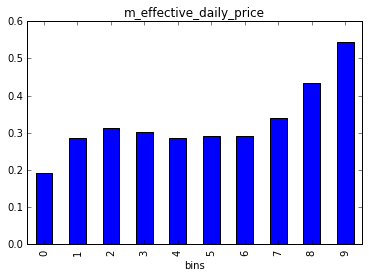

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
0         0.321697  11057     100.000000     250.000000      0.097919
1         0.404359  11057      60.000000     100.000000      0.123080
2         0.338821  11056      45.061538      60.000000      0.103122
3         0.373700  11057      33.362343      45.059887      0.113748
4         0.340689  11057      25.000000      33.362343      0.103700
5         0.364327  11056      16.476456      25.000000      0.110885
6         0.338609  11057       0.000000      16.476456      0.103067
7         0.265557  11056       0.000000       0.000000      0.080824
8         0.267885  11057       0.000000       0.000000      0.081539
9         0.269784  11057       0.000000       0.000000      0.082117
m_pricing_cleaning_fee


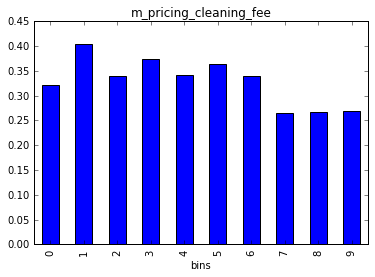

               Mean_Dep_Var   NObs
dim_market                        
Los Angeles        0.398038  31492
Paris              0.275344  68409
San Francisco      0.464560  10666
dim_market


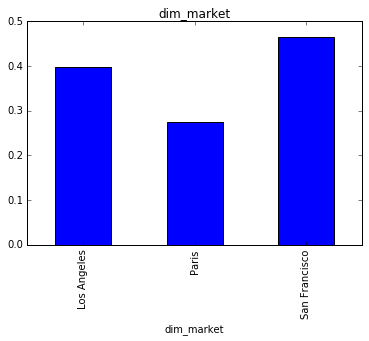

                 Mean_Dep_Var   NObs
dim_room_type                       
Entire home/apt      0.331516  77945
Private room         0.316067  28475
Shared room          0.358331   4147
dim_room_type


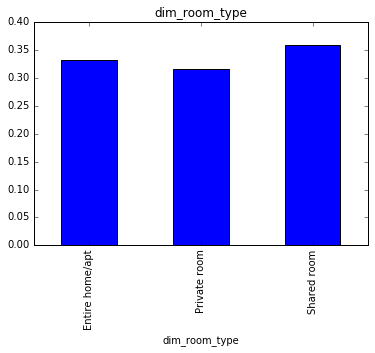

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
0         0.273311  11057            6.0           10.0      0.083191
1         0.302433  11057            4.0            6.0      0.092055
2         0.320912  11056            4.0            4.0      0.097671
3         0.316542  11057            3.0            4.0      0.096350
4         0.342950  11057            2.0            3.0      0.104388
5         0.347504  11056            2.0            2.0      0.105764
6         0.334358  11057            2.0            2.0      0.101773
7         0.348408  11056            2.0            2.0      0.106040
8         0.342046  11057            2.0            2.0      0.104113
9         0.356968  11057            1.0            2.0      0.108655
dim_person_capacity


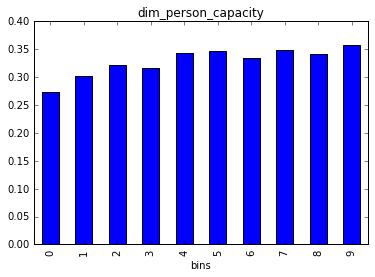

                         Mean_Dep_Var   NObs
dim_is_instant_bookable                     
False                        0.304407  94482
True                         0.470314  16085
dim_is_instant_bookable


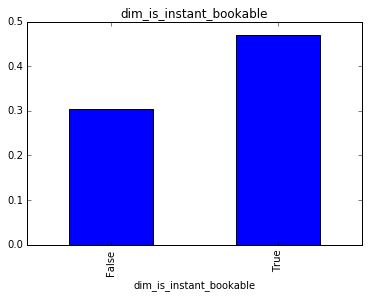

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.403101    129            NaN            NaN      0.001431
 0.0      0.567276  11044           53.0          157.0      0.172466
 1.0      0.494296  11044           28.0           53.0      0.150278
 2.0      0.439786  11044           17.0           28.0      0.133706
 3.0      0.399620  11043           10.0           17.0      0.121483
 4.0      0.341543  11044            6.0           10.0      0.103837
 5.0      0.314832  11044            3.0            6.0      0.095717
 6.0      0.256724  11043            1.0            3.0      0.078043
 7.0      0.187523  11044            0.0            1.0      0.057012
 8.0      0.143970  11044            0.0            0.0      0.043770
 9.0      0.138989  11044            0.0            0.0      0.042256
m_checkouts


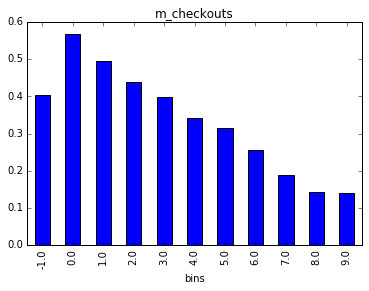

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.403101    129            NaN            NaN      0.001431
 0.0      0.568363  11044           31.0           97.0      0.172796
 1.0      0.485875  11044           16.0           31.0      0.147718
 2.0      0.434172  11044           10.0           16.0      0.131999
 3.0      0.390655  11043            6.0           10.0      0.118758
 4.0      0.353767  11044            3.0            6.0      0.107554
 5.0      0.316099  11044            2.0            3.0      0.096102
 6.0      0.251562  11043            0.0            2.0      0.076474
 7.0      0.159453  11044            0.0            0.0      0.048478
 8.0      0.158910  11044            0.0            0.0      0.048313
 9.0      0.165701  11044            0.0            0.0      0.050377
m_reviews


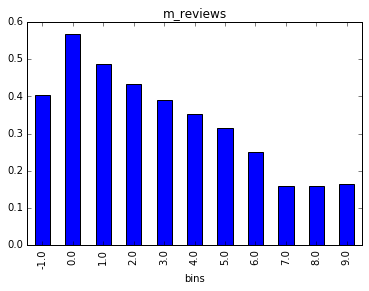

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
0         0.104459  11057         9999.0         9999.0      0.031795
1         0.102921  11057         9999.0         9999.0      0.031327
2         0.145622  11056          166.0         9999.0      0.044321
3         0.228272  11057           73.0          166.0      0.069482
4         0.313376  11057           37.0           73.0      0.095386
5         0.372467  11056           20.0           37.0      0.113362
6         0.418287  11057           11.0           20.0      0.127319
7         0.479920  11056            5.0           11.0      0.146066
8         0.535588  11057            2.0            5.0      0.163024
9         0.584517  11057            0.0            2.0      0.177917
days_since_last_booking


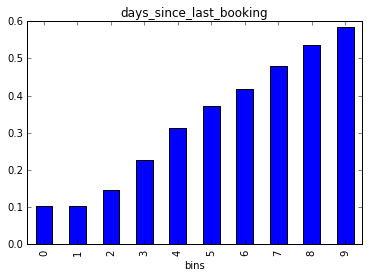

               Mean_Dep_Var   NObs
cancel_policy                     
3                  0.240421  29440
4                  0.365011  34862
5                  0.357525  46201
6                  0.148148     27
7                  1.000000      1
8                  0.000000     36
cancel_policy


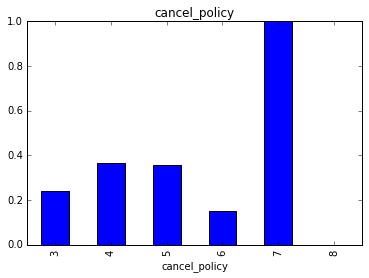

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.358455   8439            NaN            NaN      0.083274
 0.0      0.354548  10213       0.960578       0.997582      0.099681
 1.0      0.382650  10213       0.894659       0.960578      0.107581
 2.0      0.370214  10213       0.805678       0.894620      0.104085
 3.0      0.353408  10212       0.698020       0.805623      0.099350
 4.0      0.346421  10213       0.579349       0.698020      0.097396
 5.0      0.298835  10213       0.469129       0.579314      0.084017
 6.0      0.308069  10212       0.353395       0.469110      0.086605
 7.0      0.293939  10213       0.237480       0.353370      0.082641
 8.0      0.276315  10213       0.119174       0.237462      0.077685
 9.0      0.276315  10213       0.012510       0.119164      0.077685
image_quality_score


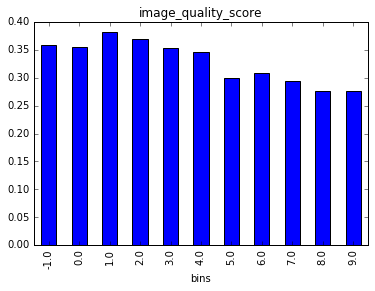

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.403101    129            NaN            NaN      0.001431
 0.0      0.574792  11044          136.0          425.0      0.174751
 1.0      0.487233  11044           71.0          136.0      0.148131
 2.0      0.435350  11044           42.0           71.0      0.132357
 3.0      0.386851  11043           25.0           42.0      0.117602
 4.0      0.363999  11044           14.0           25.0      0.110665
 5.0      0.300978  11044            5.0           14.0      0.091505
 6.0      0.253102  11043            0.0            5.0      0.076942
 7.0      0.157371  11044            0.0            0.0      0.047845
 8.0      0.160087  11044            0.0            0.0      0.048670
 9.0      0.164795  11044            0.0            0.0      0.050102
m_total_overall_rating


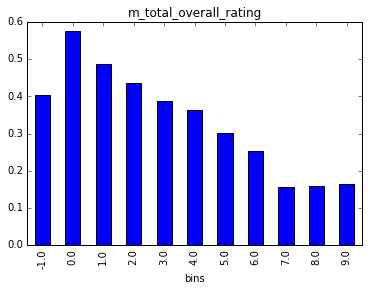

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.403101    129            NaN            NaN      0.001431
 0.0      0.352499  11044           18.0           32.0      0.107168
 1.0      0.388356  11044           13.0           18.0      0.118070
 2.0      0.436255  11044            0.0           13.0      0.132632
 3.0      0.297202  11043            0.0            0.0      0.090349
 4.0      0.303966  11044            0.0            0.0      0.092413
 5.0      0.296722  11044            0.0            0.0      0.090211
 6.0      0.309336  11043            0.0            0.0      0.094037
 7.0      0.301068  11044            0.0            0.0      0.091532
 8.0      0.297175  11044            0.0            0.0      0.090349
 9.0      0.301974  11044            0.0            0.0      0.091808
m_professional_pictures


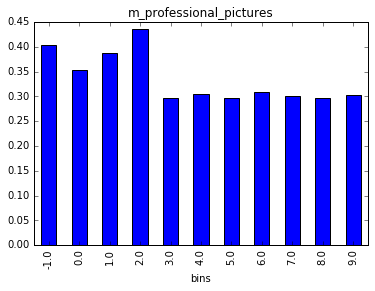

                           Mean_Dep_Var    NObs
dim_has_wireless_internet                      
0                              0.161957    6866
1                              0.339572  103701
dim_has_wireless_internet


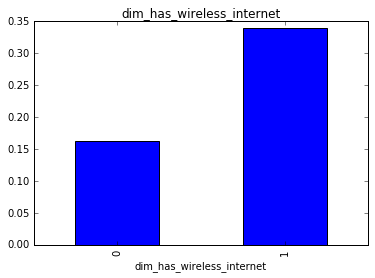

                      Mean_Dep_Var   NObs
ds_night_day_of_week                     
0                         0.308221  15849
1                         0.303578  15762
2                         0.310240  15820
3                         0.324490  15643
4                         0.336899  15610
5                         0.361924  15926
6                         0.354014  15957
ds_night_day_of_week


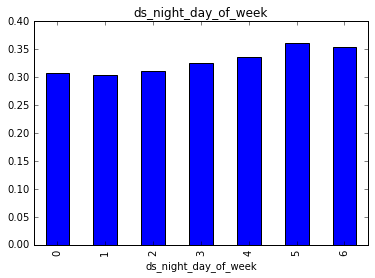

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.401799   1334            NaN            NaN      0.014755
 0.0      0.283596  10924            7.0            7.0      0.085283
 1.0      0.290396  10923            7.0            7.0      0.087320
 2.0      0.284079  10923            7.0            7.0      0.085421
 3.0      0.289664  10923            7.0            7.0      0.087100
 4.0      0.282314  10924            7.0            7.0      0.084898
 5.0      0.292502  10923            7.0            7.0      0.087954
 6.0      0.291220  10923            7.0            7.0      0.087568
 7.0      0.378925  10923            5.0            7.0      0.113940
 8.0      0.495194  10923            2.0            5.0      0.148902
 9.0      0.388594  10924            0.0            2.0      0.116858
ds_checkin_gap


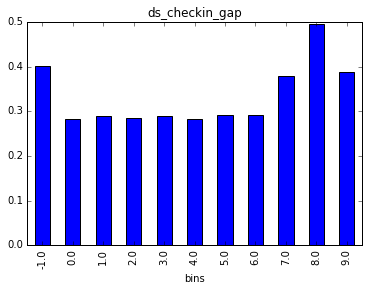

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.401799   1334            NaN            NaN      0.014755
 0.0      0.296778  10924            7.0            7.0      0.089247
 1.0      0.298544  10923            7.0            7.0      0.089770
 2.0      0.304312  10923            7.0            7.0      0.091505
 3.0      0.300650  10923            7.0            7.0      0.090404
 4.0      0.295771  10924            7.0            7.0      0.088945
 5.0      0.310629  10923            7.0            7.0      0.093404
 6.0      0.302206  10923            7.0            7.0      0.090872
 7.0      0.304587  10923            7.0            7.0      0.091587
 8.0      0.462876  10923            2.0            7.0      0.139184
 9.0      0.400128  10924            0.0            2.0      0.120327
ds_checkout_gap


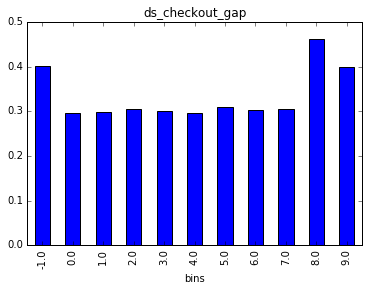

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.268289  12330            NaN            NaN      0.091064
 0.0      0.510383   9824       0.266667       0.750000      0.138028
 1.0      0.497964   9824       0.000000       0.266667      0.134669
 2.0      0.293698   9823       0.000000       0.000000      0.079420
 3.0      0.297842   9824       0.000000       0.000000      0.080548
 4.0      0.290309   9824       0.000000       0.000000      0.078511
 5.0      0.288099   9823       0.000000       0.000000      0.077906
 6.0      0.300081   9824       0.000000       0.000000      0.081154
 7.0      0.294513   9823       0.000000       0.000000      0.079640
 8.0      0.298860   9824       0.000000       0.000000      0.080824
 9.0      0.289292   9824       0.000000       0.000000      0.078236
occ_occupancy_plus_minus_7_ds_night


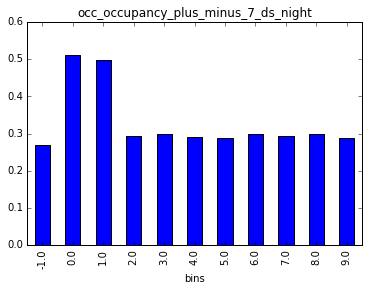

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.266672  12281            NaN            NaN      0.090156
 0.0      0.538000   9829       0.315789       0.760000      0.145571
 1.0      0.547156   9829       0.137931       0.315789      0.148048
 2.0      0.433354   9828       0.000000       0.137931      0.117244
 3.0      0.263099   9829       0.000000       0.000000      0.071189
 4.0      0.263736   9828       0.000000       0.000000      0.071354
 5.0      0.261166   9829       0.000000       0.000000      0.070666
 6.0      0.261905   9828       0.000000       0.000000      0.070858
 7.0      0.265337   9829       0.000000       0.000000      0.071794
 8.0      0.262821   9828       0.000000       0.000000      0.071106
 9.0      0.266151   9829       0.000000       0.000000      0.072015
occ_occupancy_plus_minus_14_ds_night


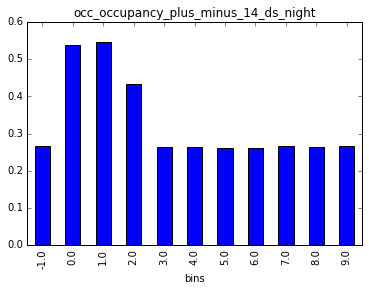

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.369963   6179            NaN            NaN      0.062930
 0.0      0.629466  10439       0.786667       0.988780      0.180890
 1.0      0.567679  10439       0.615385       0.786667      0.163134
 2.0      0.505796  10439       0.441860       0.615385      0.145350
 3.0      0.437440  10438       0.285714       0.441860      0.125695
 4.0      0.349459  10439       0.150000       0.285714      0.100424
 5.0      0.268321  10439       0.048193       0.150000      0.077107
 6.0      0.147825  10438       0.000000       0.048193      0.042476
 7.0      0.115528  10439       0.000000       0.000000      0.033199
 8.0      0.119360  10439       0.000000       0.000000      0.034301
 9.0      0.120031  10439       0.000000       0.000000      0.034493
occ_occupancy_trailing_90_ds


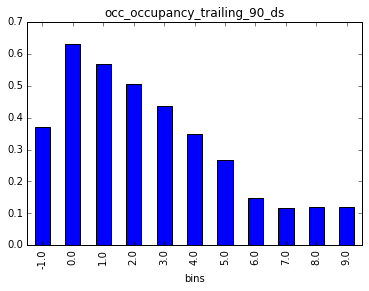

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.401799   1334            NaN            NaN      0.014755
 0.0      0.249451  10924            6.0           46.8      0.075015
 1.0      0.333516  10923            4.0            6.0      0.100286
 2.0      0.347249  10923            3.0            4.0      0.104416
 3.0      0.353017  10923            2.0            3.0      0.106150
 4.0      0.381088  10924            2.0            2.0      0.114601
 5.0      0.372974  10923            2.0            2.0      0.112151
 6.0      0.323721  10923            1.0            2.0      0.097341
 7.0      0.302756  10923            1.0            1.0      0.091037
 8.0      0.308523  10923            1.0            1.0      0.092771
 9.0      0.304193  10924            1.0            1.0      0.091477
m_minimum_nights


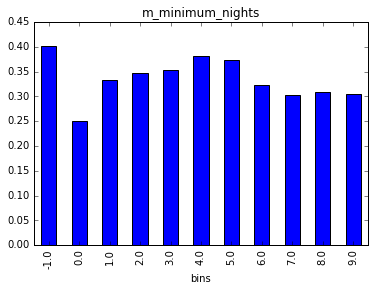

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.401799   1334            NaN            NaN      0.014755
 0.0      0.322318  10924         1125.0         1125.0      0.096928
 1.0      0.321340  10923         1125.0         1125.0      0.096625
 2.0      0.326101  10923         1125.0         1125.0      0.098056
 3.0      0.321798  10923         1125.0         1125.0      0.096763
 4.0      0.325064  10924         1125.0         1125.0      0.097754
 5.0      0.331228  10923          364.0         1125.0      0.099598
 6.0      0.413623  10923           60.0          364.0      0.124374
 7.0      0.353749  10923           30.0           60.0      0.106370
 8.0      0.332692  10923           14.0           30.0      0.100039
 9.0      0.228579  10924            4.0           14.0      0.068739
m_maximum_nights


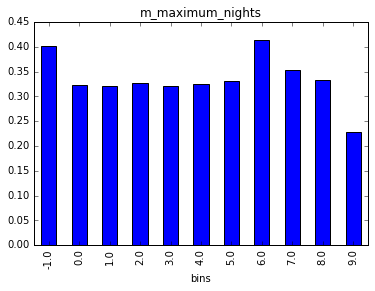

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.103372  22511            NaN            NaN      0.064059
 0.0      0.271065   8806          249.0          820.0      0.065711
 1.0      0.359300   8806          175.0          249.0      0.087100
 2.0      0.380806   8805          139.0          175.0      0.092303
 3.0      0.371338   8806          116.0          139.0      0.090018
 4.0      0.379784   8805          100.0          116.0      0.092055
 5.0      0.387917   8806           88.0          100.0      0.094037
 6.0      0.389324   8805           75.0           88.0      0.094368
 7.0      0.419032   8806           63.0           75.0      0.101580
 8.0      0.453379   8805           49.0           63.0      0.109894
 9.0      0.449126   8806           28.0           49.0      0.108875
price_booked_most_recent


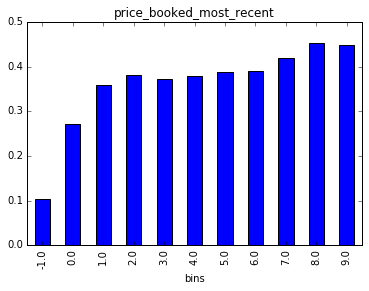

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.308667  76082            NaN            NaN      0.646479
 0.0      0.509713   3449       0.324142       0.469559      0.048395
 1.0      0.451276   3448       0.284706       0.324142      0.042834
 2.0      0.377211   3449       0.258742       0.284706      0.035815
 3.0      0.380800   3448       0.239583       0.258740      0.036145
 4.0      0.345317   3449       0.223214       0.239583      0.032786
 5.0      0.361369   3448       0.207143       0.223214      0.034301
 6.0      0.347448   3448       0.190863       0.207143      0.032979
 7.0      0.325892   3449       0.172242       0.190863      0.030942
 8.0      0.342517   3448       0.148810       0.172237      0.032511
 9.0      0.282401   3449       0.100779       0.148809      0.026813
p2_p3_click_through_score


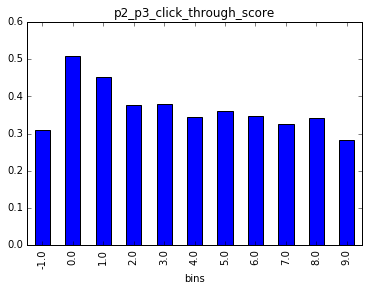

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.312542  77420            NaN            NaN      0.666107
 0.0      0.433484   3315       0.277143       0.399146      0.039558
 1.0      0.410256   3315       0.237143       0.277143      0.037439
 2.0      0.414303   3314       0.210598       0.237143      0.037797
 3.0      0.383107   3315       0.190544       0.210588      0.034961
 4.0      0.399397   3315       0.172103       0.190544      0.036448
 5.0      0.356669   3314       0.154936       0.172083      0.032539
 6.0      0.350830   3315       0.137636       0.154936      0.032016
 7.0      0.347013   3314       0.119891       0.137624      0.031658
 8.0      0.314329   3315       0.095789       0.119883      0.028685
 9.0      0.249774   3315       0.049100       0.095789      0.022794
p3_inquiry_score


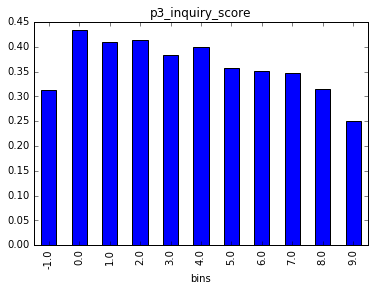

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.447275   1413            NaN            NaN      0.017398
 0.0      0.707310  10916       1.066667       4.733333      0.212547
 1.0      0.570041  10915       0.466667       1.066667      0.171282
 2.0      0.441961  10915       0.266667       0.466667      0.132797
 3.0      0.388879  10916       0.066667       0.266667      0.116858
 4.0      0.206413  10915       0.000000       0.066667      0.062022
 5.0      0.195694  10915       0.000000       0.000000      0.058801
 6.0      0.188897  10916       0.000000       0.000000      0.056764
 7.0      0.191571  10915       0.000000       0.000000      0.057562
 8.0      0.192945  10915       0.000000       0.000000      0.057975
 9.0      0.186332  10916       0.000000       0.000000      0.055993
listing_m_listing_views_2_6_ds_night_decay


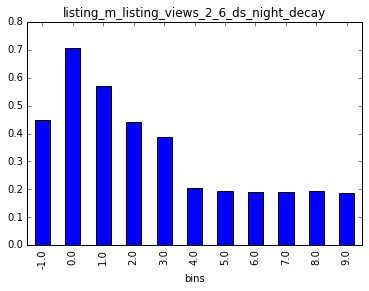

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
0         0.448042  11057    2660.142857    3341.571429      0.136376
1         0.293931  11057    2318.857143    2660.142857      0.089468
2         0.297033  11056    2067.857143    2318.857143      0.090404
3         0.356245  11057    1824.142857    2067.857143      0.108435
4         0.315004  11057    1633.000000    1824.142857      0.095882
5         0.285908  11056    1449.857143    1633.000000      0.087018
6         0.272859  11057    1266.142857    1449.857143      0.083053
7         0.285908  11056    1115.285714    1266.142857      0.087018
8         0.346658  11057     859.428571    1115.285714      0.105517
9         0.383829  11057     418.285714     859.428571      0.116831
general_market_m_unique_searchers_0_6_ds_night


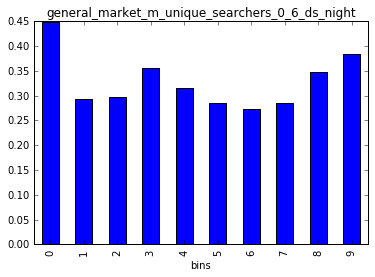

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
0         0.458171  11057     804.428571    1251.285714      0.139459
1         0.338338  11057     666.428571     804.428571      0.102984
2         0.259768  11056     576.571429     666.428571      0.079062
3         0.235236  11057     529.714286     576.571429      0.071602
4         0.293570  11057     489.714286     529.714286      0.089357
5         0.253889  11056     439.000000     489.714286      0.077272
6         0.315456  11057     384.000000     439.000000      0.096019
7         0.343524  11056     311.285714     384.000000      0.104553
8         0.329022  11057     224.285714     311.285714      0.100149
9         0.458443  11057      66.571429     224.285714      0.139542
general_market_m_contacts_0_6_ds_night


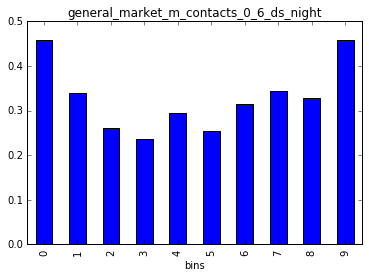

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
0         0.449670  11057     162.285714     229.428571      0.136872
1         0.346296  11057     127.000000     162.285714      0.105407
2         0.262753  11056     109.000000     127.000000      0.079970
3         0.240210  11057      96.857143     109.000000      0.073116
4         0.265443  11057      83.714286      96.857143      0.080796
5         0.292601  11056      72.000000      83.714286      0.089055
6         0.309035  11057      61.571429      72.000000      0.094065
7         0.329685  11056      50.000000      61.571429      0.100341
8         0.370806  11057      37.285714      50.000000      0.112867
9         0.418920  11057      17.285714      37.285714      0.127512
general_market_m_reservation_requests_0_6_ds_night


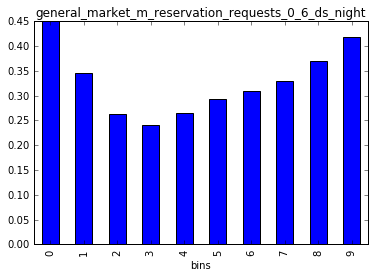

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
0         0.315908  11057       1.000000       1.000000      0.096157
1         0.314190  11057       1.000000       1.000000      0.095634
2         0.322721  11056       1.000000       1.000000      0.098222
3         0.323686  11057       1.000000       1.000000      0.098524
4         0.319255  11057       1.000000       1.000000      0.097176
5         0.324620  11056       1.000000       1.000000      0.098800
6         0.325766  11057       1.000000       1.000000      0.099158
7         0.325796  11056       1.000000       1.000000      0.099158
8         0.343131  11057       0.857143       1.000000      0.104443
9         0.370354  11057       0.714286       0.857143      0.112729
general_market_m_is_booked_0_6_ds_night


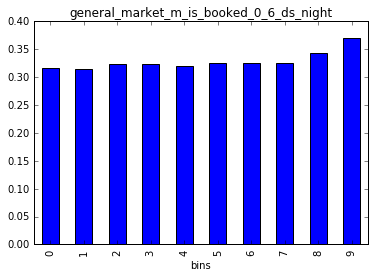

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
0         0.184046  11057        28591.0        37540.0      0.056020
1         0.293298  11057        25800.0        28591.0      0.089275
2         0.380156  11056        23599.0        25800.0      0.115702
3         0.215248  11057        22236.0        23599.0      0.065518
4         0.232070  11057        21081.0        22236.0      0.070638
5         0.324891  11056        19255.0        21081.0      0.098882
6         0.379759  11057        10775.0        19255.0      0.115592
7         0.354559  11056         9440.0        10775.0      0.107912
8         0.450755  11057         7711.0         9440.0      0.137202
9         0.470652  11057         2110.0         7711.0      0.143258
m_available_listings_ds_night


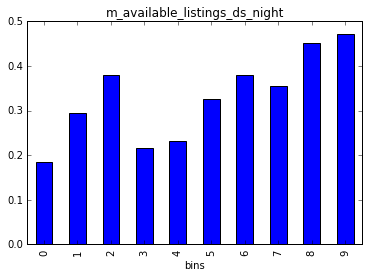

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
0         0.418377  11057       1.785714       2.410714      0.127347
1         0.403726  11057       1.500000       1.785714      0.122887
2         0.372920  11056       1.307692       1.500000      0.113500
3         0.341684  11057       1.162162       1.307692      0.104003
4         0.320069  11057       1.038462       1.162162      0.097423
5         0.305264  11056       0.897436       1.038462      0.092909
6         0.290404  11057       0.750000       0.897436      0.088394
7         0.289707  11056       0.592593       0.750000      0.088174
8         0.276476  11057       0.416667       0.592593      0.084155
9         0.266799  11057       0.103148       0.416667      0.081209
kdt_score


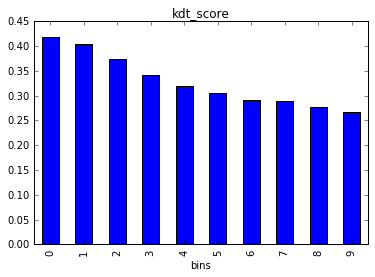

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.000000      1            NaN            NaN      0.000000
 0.0      0.445781  11057       4.139456       9.918367      0.135688
 1.0      0.412499  11057       3.061224       4.139456      0.125557
 2.0      0.377352  11056       2.428571       3.061224      0.114849
 3.0      0.352266  11057       1.994898       2.428571      0.107223
 4.0      0.321907  11056       1.632653       1.994898      0.097974
 5.0      0.322601  11057       1.307823       1.632653      0.098194
 6.0      0.287446  11056       1.020408       1.307823      0.087486
 7.0      0.276476  11057       0.693878       1.020408      0.084155
 8.0      0.263658  11056       0.346939       0.693878      0.080246
 9.0      0.225468  11057       0.000000       0.346939      0.068629
r_kdt_listing_views_0_6_avg_n100


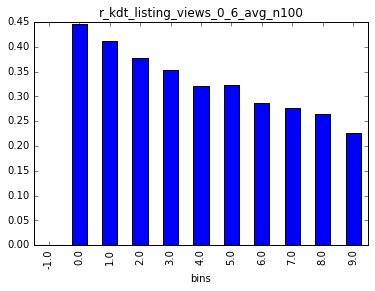

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.000000      1            NaN            NaN      0.000000
 0.0      0.324772  11057          142.0          480.0      0.098855
 1.0      0.321335  11057          120.0          142.0      0.097809
 2.0      0.306530  11056          107.0          120.0      0.093294
 3.0      0.323686  11057           96.0          107.0      0.098524
 4.0      0.338730  11056           86.0           96.0      0.103094
 5.0      0.358506  11057           72.0           86.0      0.109123
 6.0      0.357272  11056           56.0           72.0      0.108738
 7.0      0.345482  11057           38.0           56.0      0.105159
 8.0      0.312500  11056           21.0           38.0      0.095111
 9.0      0.296645  11057            3.0           21.0      0.090293
r_kdt_n_active_n100


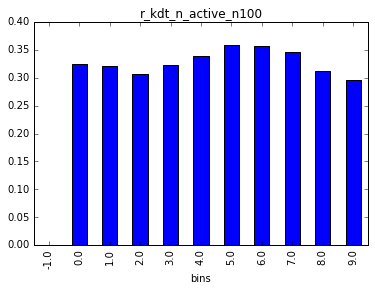

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.000000      1            NaN            NaN      0.000000
 0.0      0.259202  11057           73.0          235.0      0.078897
 1.0      0.275391  11057           60.0           73.0      0.083824
 2.0      0.296581  11056           53.0           60.0      0.090266
 3.0      0.330831  11057           47.0           53.0      0.100699
 4.0      0.334479  11056           41.0           47.0      0.101800
 5.0      0.358868  11057           35.0           41.0      0.109233
 6.0      0.363603  11056           29.0           35.0      0.110665
 7.0      0.372072  11057           21.0           29.0      0.113252
 8.0      0.374096  11056           12.0           21.0      0.113858
 9.0      0.320340  11057            2.0           12.0      0.097506
r_kdt_n_available_n100


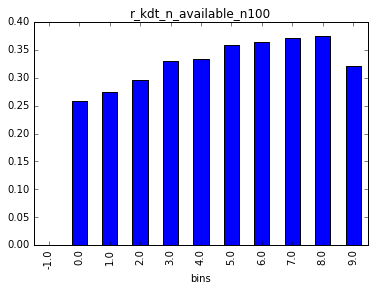

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.000000      1            NaN            NaN      0.000000
 0.0      0.414036  11057     171.500000     312.500000      0.126025
 1.0      0.408158  11057     137.500000     171.500000      0.124236
 2.0      0.388477  11056     120.000000     137.500000      0.118235
 3.0      0.348648  11057     105.351878     120.000000      0.106122
 4.0      0.313676  11056      95.182641     105.351878      0.095469
 5.0      0.307769  11057      86.453773      95.182641      0.093679
 6.0      0.282742  11056      78.691476      86.453773      0.086054
 7.0      0.268608  11057      70.953726      78.691476      0.081760
 8.0      0.278039  11056      55.987278      70.953726      0.084623
 9.0      0.275301  11057      37.000000      55.987278      0.083797
r_kdt_m_effective_daily_price_n100_p50


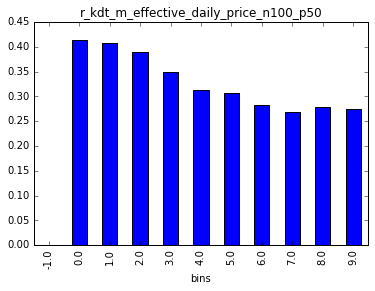

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.700000     10            NaN            NaN      0.000193
 0.0      0.404667  11056     182.000000     360.000000      0.123162
 1.0      0.417692  11056     147.235374     182.000000      0.127127
 2.0      0.385165  11055     125.000000     147.235374      0.117216
 3.0      0.350579  11056     109.628688     125.000000      0.106700
 4.0      0.313043  11056      98.504376     109.628161      0.095276
 5.0      0.306468  11055      89.298174      98.504376      0.093267
 6.0      0.271436  11056      80.621680      89.298174      0.082613
 7.0      0.282587  11055      74.000000      80.618624      0.085999
 8.0      0.277044  11056      59.000000      74.000000      0.084320
 9.0      0.276411  11056      37.427667      59.000000      0.084127
r_kdt_m_effective_daily_price_available_n100_p50


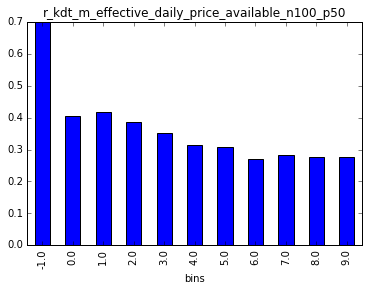

      Mean_Dep_Var   NObs  Min_Indep_Var  Max_Indep_Var  Capture_Rate
bins                                                                 
-1.0      0.219026   7821            NaN            NaN      0.047156
 0.0      0.442044  10275     150.000000     242.500000      0.125034
 1.0      0.416156  10275     125.000000     150.000000      0.117712
 2.0      0.398287  10274     109.000000     125.000000      0.112647
 3.0      0.354355  10275      96.675471     109.000000      0.100231
 4.0      0.336578  10274      85.990285      96.675471      0.095194
 5.0      0.313285  10275      77.013207      85.989295      0.088614
 6.0      0.289858  10274      68.700194      77.003700      0.081980
 7.0      0.274550  10275      60.000000      68.700194      0.077658
 8.0      0.284115  10274      49.000000      60.000000      0.080356
 9.0      0.259562  10275      28.247135      49.000000      0.073418
r_kdt_m_effective_daily_price_booked_n100_p50


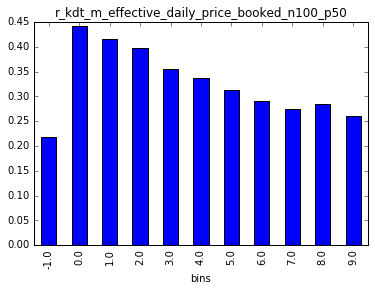

        Mean_Dep_Var   NObs
season                     
1           0.257828  31521
2           0.364480  25653
3           0.358010  26097
4           0.348256  27296
season


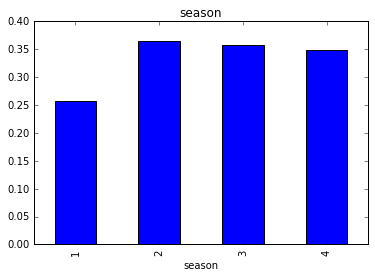

In [12]:
### Plotting Code ###
import matplotlib.pyplot as plt
for col in train:
    if col not in ('dim_is_requested'):
        X= udf.rankplot(train, col, 'dim_is_requested', tranches=10)
        if not X.empty:
            print X
            print col
            X.Mean_Dep_Var.plot(kind='bar', title=col)
            plt.show()

### Checkpoint #1
After looking at the plots, we have a basic idea of which variables have strong predictive power. For example, **number of days since last booking** has a strong linear trend.
Next, I will fit a simple model (without much parameter tuning) and see what important features come up, and whether the model performance is good.

In [13]:
### prepare modeling dataset - map categorical vars to average event rate ###
train_cat = train.ix[:,cat_col]
test_cat = test.ix[:,cat_col]

### Call helper function to get the qualitative features hashed ###
train_cat_cleaned, test_cat_cleaned = udf.OOB_averages(train_cat, test_cat, train.dim_is_requested)

Hashing categorical features....
dim_market
['Paris' 'Los Angeles' 'San Francisco']
dim_room_type
['Entire home/apt' 'Private room' 'Shared room']
dim_is_instant_bookable
['False' 'True']
cancel_policy
['3' '4' '5' '8' '6' '7']
dim_has_wireless_internet
['1' '0']
ds_night_day_of_week
['1' '0' '3' '6' '2' '5' '4']
season
['4' '2' '1' '3']


In [14]:
### Append qualitative features back to model ###
train.drop(cat_col,axis=1, inplace=True)
train.reset_index(inplace=True, drop=True)
train_cat_cleaned.reset_index(inplace=True, drop=True)
train=pd.concat([train,train_cat_cleaned],axis=1)

test.drop(cat_col,axis=1, inplace=True)
test.reset_index(inplace=True, drop=True)
test_cat_cleaned.reset_index(inplace=True, drop=True)
test=pd.concat([test,test_cat_cleaned],axis=1)

In [15]:
## convert dataframe to numpy to feed into sklearn ##
y_train_data = train.dim_is_requested.values
x_train_data = train.drop('dim_is_requested',axis=1).values

y_test_data = test.dim_is_requested.values
x_test_data = test.drop('dim_is_requested',axis=1).values

### Checkpoint 2
We have converted the modeling data to numpy for scikit learn.
For simplicity, using all features now. 
    * Treated categorical as hashing to mean event rate
    * Treated numerical as median imputation  
For imputation, later if a variable is deemed important, can always look at plot to determine a better imputation
    * Looking at plots and volume of missing, seems median imputation is fine for most

In [16]:
### impute numeric vars with median ###
print np.isnan(x_train_data).sum(), 'missing in Train'
print np.isnan(x_test_data).sum(), 'missing in OOT1'

from sklearn.preprocessing import Imputer
imp1 = Imputer(strategy='median')
imp1.fit(x_train_data)
x_train_data=imp1.transform(x_train_data)
x_test_data=imp1.transform(x_test_data)
print 'Finished imputing missing values with median...'

### Check if all values are now numeric ###
print np.isnan(x_train_data).sum(), 'should be zero'
print np.isnan(x_test_data).sum(), 'should be zero'

230342 missing in Train
154476 missing in OOT1
Finished imputing missing values with median...
0 should be zero
0 should be zero


In [17]:
print 'Modeling data dimensions:'
print x_train_data.shape, x_test_data.shape
print train['dim_is_requested'].mean(), test['dim_is_requested'].mean()

Modeling data dimensions:
(110567L, 39L) (73712L, 39L)
0.328542874456 0.328087692642


In [18]:
### Fit Random Forest ###
from sklearn.ensemble import RandomForestClassifier
est=RandomForestClassifier(n_estimators=500,n_jobs=-1)

### Checkpoint 3
Random Forest should serve as a good benchmark score. More sophisticated methods such as Boosted Trees may perform better but requires much more tuning.  
For now, will run RF with 5-fold CV on training dataset to see model performance.
Next, if results look good, train again on whole training dataset.

In [19]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_auc_score
print(cross_val_score(est, x_train_data, y_train_data, cv=5, scoring='roc_auc'))

[ 0.90656197  0.90562892  0.90521112  0.90549621  0.90974582]


In [20]:
## Train on entire dev dataset ##
est.fit(x_train_data,y_train_data)

### Predict scores on test set ###
from sklearn.metrics import roc_auc_score
y_pred = est.predict_proba(x_test_data)[:,1]
print roc_auc_score(y_test_data,y_pred)

0.912519694934


### Model Performance
Ok, so it seems the baseline AUC is around 90% which is great.  
Overfitting didn't seem to be much of an issue as the 5-fold CV scores and test scores are all around 90% AUC.  
Of course, I think more feature engineering and missing value imputation can be done to improve the performance of this model (i.e. create features to determine market oversupply or undersupply), but for now, I think this model serves as a good predictor.

In [21]:
# View feature importance #
feature_names = train.columns.values[1:]
udf.output_feature_importance(est,feature_names,k=10)

,Variable_Name,Importance
0,listing_m_listing_views_2_6_ds_night_decay,0.082903
1,occ_occupancy_trailing_90_ds,0.081863
2,m_effective_daily_price,0.075008
3,days_since_last_booking,0.056139
4,m_available_listings_ds_night,0.044039
5,price_booked_most_recent,0.033202
6,r_kdt_m_effective_daily_price_available_n100_p50,0.033036
7,r_kdt_m_effective_daily_price_n100_p50,0.032963
8,general_market_m_contacts_0_6_ds_night,0.032510
9,r_kdt_listing_views_0_6_avg_n100,0.032225


### Feature Interpretation
Looking at the feature importances of the Random Forest, it tells us which feature resulted in the most node impurity reduction weighted by samples reaching that node. In other words, it is a measure of which feature is best at doing a tree split.
However, we would probably also be interested in knowing how much each feature contributed to the final probability of a booking occuring.

For this task, I will use the open-source package *treeinterpreter* which computes the contribution of each feature to the final predicted class probability. An introduction can be found in this [blog](http://blog.datadive.net/random-forest-interpretation-with-scikit-learn/).  A white paper on the method can be found [here](https://pdfs.semanticscholar.org/28ff/2f3bf5403d7adc58f6aac542379806fa3233.pdf)

In general, tree based methods are also more robust than regression methods in terms of model sensitivity to multicollinearity. If time permits, we can use simple methods such as Variance Inflation Factor (VIF) to detect similar underlying effect in features and do feature selection.

In [22]:
from treeinterpreter import treeinterpreter as ti

## For timing concerns, we take a random sample from the test set, and then take the average contributions of each feature ##
idx = np.random.randint(len(x_test_data), size=100)
instance=x_test_data[idx,:]

In [24]:
Prediction, bias, contributions = ti.predict(est, instance)

In [25]:
## Average contribution per feature for class = 1 ##
avg_contrib = np.mean(contributions, axis=0)[:,1] 
contrib = pd.concat([pd.DataFrame(avg_contrib), pd.DataFrame(feature_names)],axis=1)
contrib.columns=list(['contributions','features'])
contrib['abs_contr'] = contrib.contributions.abs()
contrib.sort_values('abs_contr', ascending=False)

,contributions,features,abs_contr
13,0.017427,occ_occupancy_trailing_90_ds,0.017427
19,0.014938,listing_m_listing_views_2_6_ds_night_decay,0.014938
0,-0.009280,m_effective_daily_price,0.009280
20,0.004952,general_market_m_unique_searchers_0_6_ds_night,0.004952
22,0.004423,general_market_m_reservation_requests_0_6_ds_n...,0.004423
24,0.003193,m_available_listings_ds_night,0.003193
28,0.002779,r_kdt_n_available_n100,0.002779
10,0.002153,ds_checkout_gap,0.002153
9,-0.002104,ds_checkin_gap,0.002104
14,-0.001877,m_minimum_nights,0.001877


### Model Analysis
Looking at the above contributions, which features are within control of a host?
* Ideally, we would like to alter the most contributing factors, but occupancy rate seems to be a result rather than a controllable factor. 
* For the short-term, the easiest factor that a host can control is to lower the listing price

Thus, we can look at the predictions in the test set with booking probability close to 0.5 (the classifier will predict =0.5 as 0) to dig deeper into the data.

In [28]:
### First see the predictions distribution in the test dataset ###
np.unique(y_pred)[np.unique(y_pred) >= 0.49]

array([ 0.49 ,  0.492,  0.494,  0.496,  0.498,  0.5  ,  0.502,  0.504,
        0.506,  0.508,  0.51 ,  0.512,  0.514,  0.516,  0.518,  0.52 ,
        0.522,  0.524,  0.526,  0.528,  0.53 ,  0.532,  0.534,  0.536,
        0.538,  0.54 ,  0.542,  0.544,  0.546,  0.548,  0.55 ,  0.552,
        0.554,  0.556,  0.558,  0.56 ,  0.562,  0.564,  0.566,  0.568,
        0.57 ,  0.572,  0.574,  0.576,  0.578,  0.58 ,  0.582,  0.584,
        0.586,  0.588,  0.59 ,  0.592,  0.594,  0.596,  0.598,  0.6  ,
        0.602,  0.604,  0.606,  0.608,  0.61 ,  0.612,  0.614,  0.616,
        0.618,  0.62 ,  0.622,  0.624,  0.626,  0.628,  0.63 ,  0.632,
        0.634,  0.636,  0.638,  0.64 ,  0.642,  0.644,  0.646,  0.648,
        0.65 ,  0.652,  0.654,  0.656,  0.658,  0.66 ,  0.662,  0.664,
        0.666,  0.668,  0.67 ,  0.672,  0.674,  0.676,  0.678,  0.68 ,
        0.682,  0.684,  0.686,  0.688,  0.69 ,  0.692,  0.694,  0.696,
        0.698,  0.7  ,  0.702,  0.704,  0.706,  0.708,  0.71 ,  0.712,
      

In [29]:
## So thre are predictions exactly = 0.5. Let's take a closer look at these ##
## Merge scores back to testing dataset ##
test_scores = pd.DataFrame(y_pred, columns=['pred'])
test_merged = pd.concat([test, test_scores], axis=1)

In [30]:
## Of these samples with P=0.5, are there actual responders? ##
test_merged[(test_merged.pred==0.5) & (test_merged.dim_is_requested ==1)].describe()

,dim_is_requested,m_effective_daily_price,m_pricing_cleaning_fee,dim_person_capacity,m_checkouts,m_reviews,days_since_last_booking,image_quality_score,m_total_overall_rating,m_professional_pictures,ds_checkin_gap,ds_checkout_gap,occ_occupancy_plus_minus_7_ds_night,occ_occupancy_plus_minus_14_ds_night,occ_occupancy_trailing_90_ds,m_minimum_nights,m_maximum_nights,price_booked_most_recent,p2_p3_click_through_score,p3_inquiry_score,listing_m_listing_views_2_6_ds_night_decay,general_market_m_unique_searchers_0_6_ds_night,general_market_m_contacts_0_6_ds_night,general_market_m_reservation_requests_0_6_ds_night,general_market_m_is_booked_0_6_ds_night,m_available_listings_ds_night,kdt_score,r_kdt_listing_views_0_6_avg_n100,r_kdt_n_active_n100,r_kdt_n_available_n100,r_kdt_m_effective_daily_price_n100_p50,r_kdt_m_effective_daily_price_available_n100_p50,r_kdt_m_effective_daily_price_booked_n100_p50,dim_market,dim_room_type,dim_is_instant_bookable,cancel_policy,dim_has_wireless_internet,ds_night_day_of_week,season,pred
count,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,59.000000,62.000000,62.000000,61.000000,61.000000,52.000000,53.000000,60.000000,61.000000,61.000000,60.000000,18.000000,18.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,58.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01,62.000000,62.000000,62.0
mean,1.0,136.019154,47.485853,3.645161,28.612903,17.403226,354.096774,0.594696,77.741935,6.258065,5.163934,5.180328,0.139641,0.157182,0.431609,2.704918,618.016393,134.183333,0.191983,0.214311,0.372043,1567.315668,462.299539,82.626728,0.972350,15470.516129,1.063153,2.307851,90.903226,43.725806,123.346370,129.089994,105.954073,0.352618,0.327397,0.339194,0.333859,3.395724e-01,0.330171,0.328339,0.5
std,0.0,102.724580,55.676899,2.509632,42.014188,27.015150,1775.980899,0.298730,119.927565,9.371977,2.596025,2.661505,0.232901,0.231333,0.317007,1.666776,528.631488,101.867892,0.061718,0.068702,0.659585,781.693311,296.046353,53.749069,0.072423,9424.328993,0.577244,2.167827,84.297815,38.970005,92.118168,94.559269,58.559598,0.079056,0.009197,0.068088,0.050982,5.596431e-17,0.021950,0.045846,0.0
min,1.0,32.641490,0.000000,1.000000,0.000000,0.000000,0.000000,0.021792,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,36.000000,0.096213,0.127843,0.000000,324.428571,59.857143,14.714286,0.714286,1864.000000,0.000000,0.000000,6.000000,4.000000,40.689460,41.819723,24.865781,0.275344,0.316067,0.304407,0.240421,3.395724e-01,0.303578,0.257828,0.5
25%,1.0,67.937500,7.224519,2.000000,4.000000,1.250000,3.000000,0.336903,5.750000,0.000000,4.000000,2.000000,0.000000,0.000000,0.142857,1.000000,30.000000,72.750000,0.155987,0.174419,0.000000,1059.785714,277.178571,44.357143,1.000000,8825.250000,0.600000,1.010204,45.500000,22.000000,76.324966,82.362236,70.375000,0.275344,0.316067,0.304407,0.357525,3.395724e-01,0.308726,0.257828,0.5
50%,1.0,114.600000,27.641295,3.000000,12.500000,6.000000,13.500000,0.639709,29.500000,0.000000,7.000000,7.000000,0.000000,0.000000,0.448701,2.000000,1125.000000,112.500000,0.182999,0.200735,0.033333,1411.714286,449.714286,71.071429,1.000000,13817.000000,1.061584,1.790306,75.000000,37.500000,103.750000,104.038451,88.539742,0.398038,0.331516,0.304407,0.357525,3.395724e-01,0.324490,0.348256,0.5
75%,1.0,140.650000,60.000000,4.000000,33.750000,22.750000,39.750000,0.834175,105.000000,14.000000,7.000000,7.000000,0.266667,0.275862,0.741071,3.000000,1125.000000,156.000000,0.217761,0.249803,0.450000,1949.464286,583.678571,103.928571,1.000000,22831.750000,1.443627,3.061224,112.000000,57.750000,125.051481,137.902777,119.317890,0.398038,0.331516,0.304407,0.365011,3.395724e-01,0.354014,0.364480,0.5
max,1.0,504.858911,250.000000,14.000000,201.000000,148.000000,9999.000000,0.999617,670.000000,30.000000,7.000000,7.000000,0.750000,0.769231,0.955882,7.000000,1125.000000,501.000000,0.349554,0.375385,3.133333,3561.00

### The Recommendation
Looking at the above samples, we can dig deeper into the data to find out how we can increase the probability of booking for these listings.

Looking at the **effective_price**, the kdt_effective_price, kdt_effect_prive_available, and kdt_effective_price_booked can help us answer this question.

From the above desriptive statistics, we see the average effective price for these 62 listings is \$136  
The effective price of all available bookings in this KDT is roughly \$129 
Yet effective price of all booked listings in this KDT is just \$105  
This gives us a rough idea of what is happening. These listing are not getting booked possibly because the listing price is higher than the median KDT available bookings price. Furthermore, price of booked listing within the kdt is even lower.  

My recommendation is we should ask listings with effective_price > effective_price_book_kdt to take the kdt booked price.

To test this out, I made the corresponding changes to these data points, re-ran the model, and then observed what the post booking probabilities are.

In [31]:
## Slice out our dataset of interest, and make changes to it ##
tmp = test_merged[(test_merged.pred==0.5) & (test_merged.dim_is_requested ==1)]
idx = tmp.m_effective_daily_price>tmp.r_kdt_m_effective_daily_price_booked_n100_p50
tmp.loc[idx,'m_effective_daily_price'] = tmp.loc[idx,'r_kdt_m_effective_daily_price_booked_n100_p50']

C:\Users\tli19\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
## Impute missing values in the same way as before ##
tmp_values=imp1.transform(tmp.iloc[:,1:40].values)

y_pred_new = est.predict_proba(tmp_values)[:,1]

In [35]:
print 'Incremental bookings: ' + str(sum(y_pred_new>0.5) - sum(y_pred_new<0.5))


Incremental bookings: 26


### Conclusion
After making the changes, we have incrementally increased the booking probability of 26 listings.  
Of course, this is just one possible way to utlize this model to help hosts increase their booking (occupancy) rate. 

### Next Steps
Additional performance metrics can be used to determine the effectiveness of this model (some may be more suitable to specific business needs).  
To further improve this model, we can explore more feature engineering, utlize multi-layer models and stacked generalizations.  
To further improve model interpretation, we can do additional feature selection to obtain a set of orthgonal features. A simple first step can be to examine the VIF; To determine non-linear interactions, measurements such as mutual information can be leveraged.